<img src='../img/dust_banner.png' alt='Training school and workshop on dust' align='center' width='100%'></img>

<br>

# Day 3 - Practical exercise - Solution

### About

> So far, we have analysed satellite, model and ground-based observation data for one specific event. <br>
> Today, we would like to broaden our perspective and analyse more in detail the annual cycle and seasonality of dust and aerosols.




### Tasks

#### 1. Brainstorm
  * What data, introduced to you in week 1, can be used for analysing the annual cylce and patterns of dust?
  * What aggregation level is required?
  * Which variables to analyse dust do you know and are available?

#### 2. Download and plot monthly Metop-A/B/C GOME-2 Level 3 Absorbing Aerosol Index data for 2020 ([Go to solution](#gome2_aai))
  * Download monthly Metop-A/B/C GOME-2 Absorbing Aerosol Index data for year 2020 and plot the monthly values as map featuring a geographical subset for bounding box N:70°, E:36°, S:0°, W:-50°
  * **Hint** 
    * [Metop-A/B/C - Example notebook](../../dust_workshop_part1/01_satellite-based_data/13_Metop-ABC_GOME-2_AAI_L3_load_browse.ipynb)
    * [Data access](https://www.temis.nl/airpollution/absaai/#GOME2_AAI)
  * **Some questions to reflect on**
    * Can you identify some patterns? Describe the patterns you observe for each month.
    * Were some months more affected by desert dust than others in average?

#### 3. Load AERONET observations and CAMS reanalysis (EAC4) time-series for Santa Cruz, Tenerife in 2020 and plot monthly aggregates in one plot ([Go to solution](#aeronet_cams_ts))
  * Load the time-series of daily aggregated AERONET observations and CAMS reanalysis (EAC4) for Santa Cruz, Tenerife in 2020, resample the values to monthly averages and plot the monthly averaged values together in one plot
  * **Hint** 
    * [Day 2 Assignment - Solution notebook](../day_2/day2_assignment_solution.ipynb)
    * [Link to data file](../data/2020_ts_cams_aeronet.csv)
  * **Some questions to reflect on**
    * Interpret the plotting result
    * Do the monthly patterns of AERONET observations and CAMS reanalysis look similar?
    * Do the patterns resemble those of Metop-A/B/C GOME-2 Level 3 Absorbing Aerosol Index data?

### Module outline
* [1 - Download and plot monthly Metop-A/B/C GOME-2 Level 3 Absorbing Aerosol Index data for year 2020](#gome2_aai)
* [2 - Load AERONET and CAMS reanalysis (EAC4) time-series for Santa Cruz, Tenerife in 2020 and plot monthly aggregates in one plot](#aeronet_cams_ts)



<hr>

##### Load required libraries

In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd

from IPython.display import HTML

import matplotlib.pyplot as pl
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

from datetime import datetime

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

##### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

### <a id='gome2_aai'></a>1. Download and plot monthly Metop-A/B/C GOME-2 Level 3 Absorbing Aerosol Index data for year 2020

The Metop-A/B/C GOME-3 Level 3 AAI data files can be downloaded from the TEMIS website in `NetCDF` data format. TEMIS offers the data of all three satellites Metop-A, -B and -C, which, combined, provide monthly measurements for the entire globe.

The following example uses monthly gridded AAI data from the three satellites Metop-A, -B, and -C for 2020.
Since the data is distributed in the `NetCDF` format, you can use the xarray function `xr.open_mfdataset()` to load the multiple netCDF files at once.


In [3]:
ds_a = xr.open_mfdataset('../data/gome2/ESACCI-AEROSOL-L3-AAI-GOME2A-1M-2020*.nc', 
                         concat_dim='time', 
                         combine='nested')

aai_a=ds_a['absorbing_aerosol_index']
aai_a

<xarray.DataArray 'absorbing_aerosol_index' (time: 12, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(12, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: time
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

<br>

The same process has to be repeated for the daily gridded AAI data from the satellites Metop-B and Metop-C respectively.
Below, we load the GOME-2 Level 3 AAI data from the Metop-B satellite.

In [4]:
ds_b = xr.open_mfdataset('../data/gome2/ESACCI-AEROSOL-L3-AAI-GOME2B-1M-2020*.nc', 
                         concat_dim='time', 
                         combine='nested')

aai_b =ds_b['absorbing_aerosol_index']
aai_b

<xarray.DataArray 'absorbing_aerosol_index' (time: 12, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(12, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: time
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

<br>

And here, we load the daily gridded GOME-2 AAI Level 3 data files from the Metop-C satellite.

In [5]:
ds_c = xr.open_mfdataset('../data/gome2/ESACCI-AEROSOL-L3-AAI-GOME2C-1M-2020*.nc', 
                         concat_dim='time', 
                         combine='nested')

aai_c=ds_c['absorbing_aerosol_index']
aai_c

<xarray.DataArray 'absorbing_aerosol_index' (time: 12, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(12, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: time
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

<br>

#### Concatenate the data from the three satellites Metop-A, -B and -C

The next step is to concatenate the `DataArrays` from the three satellites Metop-A, -B and -C using a new dimension called `satellite`. 
You can use the `concat()` function from the xarray library to do this. The result is a four-dimensional `xarray.DataArray`, with the dimensions `satellite`, `time`, `latitude` and `longitude`.

In [6]:
aai_concat = xr.concat([aai_a,aai_b,aai_c], dim='satellite')
aai_concat

<xarray.DataArray 'absorbing_aerosol_index' (satellite: 3, time: 12, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(3, 12, 180, 360), dtype=float32, chunksize=(1, 1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: satellite, time
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

<br>

#### Retrieve  time coordinate information and assign time coordinates for the time dimension

You can see that the resulting `xarray.DataArray` holds coordinate information for the two spatial dimensions `longitude` and `latitude`, but not for `time` and `satellite`.
However, the coordinates for `time` will be important for plotting the data as we need to know which month the data is valid. Thus, a next step is to assign coordinates to the `time` dimension.

With the help of the Python library `pandas`, you can build a `DateTime` time series for the months in 2020, from 1 January to 31 December 2021.

In [7]:
time_coords = pd.date_range(datetime.strptime('01-2020','%m-%Y'), periods=12, freq='m').strftime("%Y-%m").astype('datetime64[ns]')
time_coords

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', freq=None)

<br>

The final step is to assign the pandas time series object `time_coords` to the `aai_concat` DataArray object. You can use the `assign_coords()` function from xarray. The result is that the time coordinates have now been assigned values. The only dimension the remains unassigned is `satellite`.

In [8]:
aai_concat = aai_concat.assign_coords(time=time_coords)
aai_concat

<xarray.DataArray 'absorbing_aerosol_index' (satellite: 3, time: 12, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(3, 12, 180, 360), dtype=float32, chunksize=(1, 1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01
Dimensions without coordinates: satellite
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

<br>

#### Combine AAI data from the three satellites Metop-A, -B and -C onto one single grid

Since the final aim is to combine the data from the three satellites Metop-A, -B and -C onto one single grid, the next step is to reduce the `satellite` dimension. You can do this by applying the reduce function `mean` to the `aai_concat` Data Array. The dimension (`dim`) to be reduced is the `satellite` dimension.

This function builds the average of all data points within a grid cell. The resulting `xarray.DataArray` has three dimensions `time`, `latitude` and `longitude`.

In [9]:
aai_combined = aai_concat.mean(dim='satellite')
aai_combined

<xarray.DataArray 'absorbing_aerosol_index' (time: 12, latitude: 180, longitude: 360)>
dask.array<mean_agg-aggregate, shape=(12, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01

<br>

#### Visualize AAI data with data from the three satellites Metop-A, -B and C combined on one single grid

The next step is to visualize the Absorbing Aerosol Index data for one time step. You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) for it.

You can use `afmhot_r` as color map, `ccrs.PlateCarree()` as projection and by applying `dt.strftime('%Y-%m-%d').data` to the time coordinate variable, you can add the valid time step to the title of the plot.

Let us plot a geographic subset over Western Africa and the Atlantic (N: 70, E:36, S:0, W:-50).

Plot different months. Can you identfy some patterns? Were some months more affected by desert dust than others in average?

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Absorbing aerosol index averaged for each grid cell - 2020-06'}>)

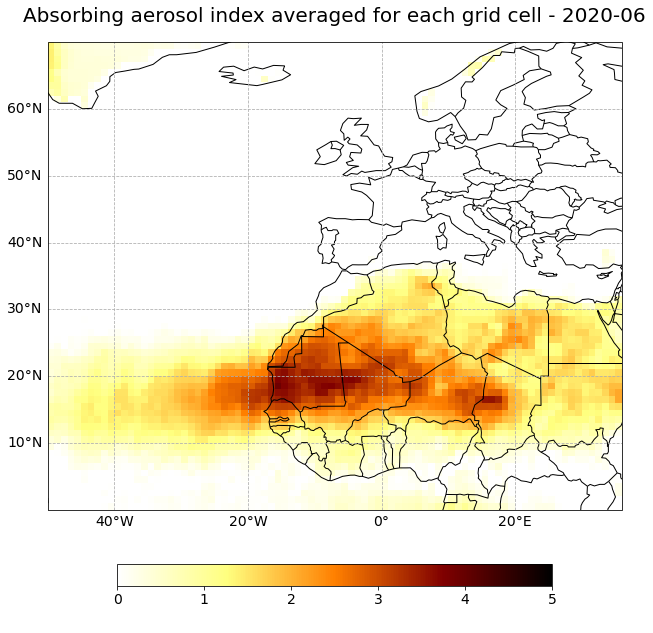

In [10]:
month=5
visualize_pcolormesh(data_array=aai_combined[month,:,:],
                     longitude=aai_combined.longitude, 
                     latitude=aai_combined.latitude,
                     projection=ccrs.PlateCarree(), 
                     color_scale='afmhot_r', 
                     unit=' ',
                     long_name=aai_a.long_name + ' - ' + str(aai_combined.time[month].dt.strftime('%Y-%m').data), 
                     vmin=0, 
                     vmax=5, 
                     lonmin=-50, 
                     lonmax=36, 
                     latmin=0, 
                     latmax=70.,
                     set_global=False)


### <a id='aeronet_cams_ts'></a>2. Load AERONET and CAMS reanalysis (EAC4) time-series for Santa Cruz, Tenerife in 2020 and plot monthly aggregates

The file is a result from [Day 2 - Assignment](../day_2/day2_assignment_solution.ipynb#visualize_annual_ts) and the created pandas dataframe was saved as a `csv` file under `../data/2020_ts_cams_aeronet.csv`. We can open it with the pandas function `read_table()`. We additonally set specific keyword arguments:
* `delimiter`: specify the delimiter in the text file, e.g. comma

You see below that the resulting dataframe has 366 rows and 5 columns: `time`, `longitude`, `latitude`, `duaod550`, `AOD_500nm`. The columns `duaod550` are the dust aersol optical depth values from the CAMS reanalysis and `AOD_500nm` are the station measurements from AERONET.

In [21]:
df = pd.read_csv('../data/2020_ts_cams_aeronet.csv', delimiter=',')
df

,time,longitude,latitude,duaod550,AOD_500nm
0,2020-01-01,-16.25,28.25,0.062677,0.094487
1,2020-01-02,-16.25,28.25,0.121897,NaN
2,2020-01-03,-16.25,28.25,0.064505,0.075765
3,2020-01-04,-16.25,28.25,0.006812,0.098110
4,2020-01-05,-16.25,28.25,0.001114,0.085672
...,...,...,...,...,...
361,2020-12-27,-16.25,28.25,0.069240,0.134366
362,2020-12-28,-16.25,28.25,0.215455,0.415433
363,2020-12-29,-16.25,28.25,0.182338,0.320463
364,2020-12-30,-16.25,28.25,0.072843,0.095342


<br>

Let us now convert the `time` column to a `DateTimeIndex` format with the function `to_datetime()`. Important here, you have to specify the format of the index string: `%Y-%m-%d`.

In [32]:
df.index = pd.to_datetime(df.time, format = '%Y-%m-%d')
df

,time,longitude,latitude,duaod550,AOD_500nm
time,,,,,
2020-01-01,2020-01-01,-16.25,28.25,0.062677,0.094487
2020-01-02,2020-01-02,-16.25,28.25,0.121897,NaN
2020-01-03,2020-01-03,-16.25,28.25,0.064505,0.075765
2020-01-04,2020-01-04,-16.25,28.25,0.006812,0.098110
2020-01-05,2020-01-05,-16.25,28.25,0.001114,0.085672
...,...,...,...,...,...
2020-12-27,2020-12-27,-16.25,28.25,0.069240,0.134366
2020-12-28,2020-12-28,-16.25,28.25,0.215455,0.415433
2020-12-29,2020-12-29,-16.25,28.25,0.182338,0.320463


<br>

We are interested in the monthly averages of aerosol optical depth in 2020. With the function `resample()`, we can create the monthly averages based on the daily AOD values. The result is a data frame with 12 row entries and 4 columns.

In [33]:
df_resample = df.resample('1M').mean()
df_resample

,longitude,latitude,duaod550,AOD_500nm
time,,,,
2020-01-31,-16.25,28.25,0.034638,0.117633
2020-02-29,-16.25,28.25,0.163640,0.245622
2020-03-31,-16.25,28.25,0.047373,0.133028
2020-04-30,-16.25,28.25,0.002262,0.085046
2020-05-31,-16.25,28.25,0.018629,0.099021
2020-06-30,-16.25,28.25,0.147789,0.082430
2020-07-31,-16.25,28.25,0.256171,0.357828
2020-08-31,-16.25,28.25,0.149128,0.267296
2020-09-30,-16.25,28.25,0.199188,0.195343


<br>

The last step is now to plot the two columns of the pandas.DataFrame `df_resample` as two individual line plots.

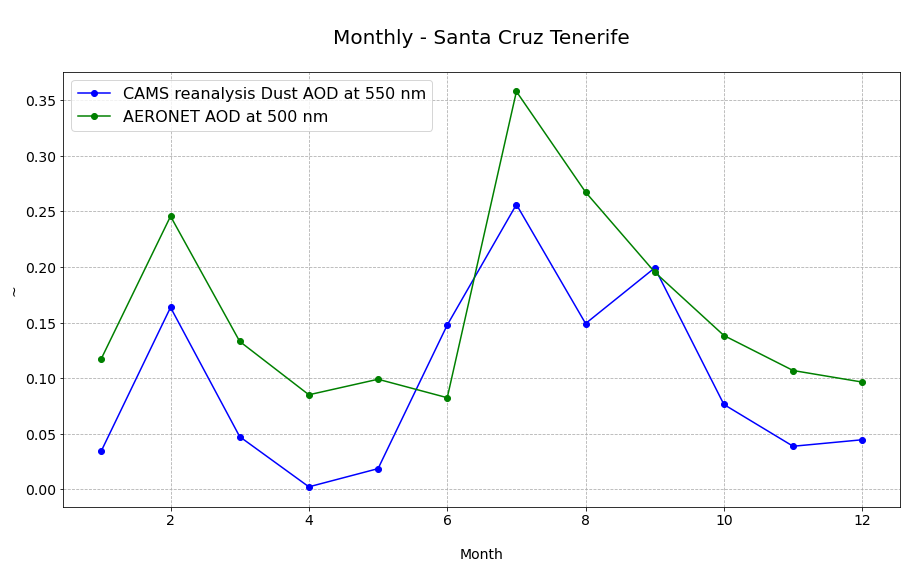

In [35]:
# Initiate a figure
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()

# Define the plotting function
#ax.plot(gome2_ts.time, gome2_ts, 'o-', color='orange',  label='Metop-A/B/C GOME-2 AAI')
ax.plot(df_resample.index.month, df_resample.duaod550, 'o-', color='blue', label='CAMS reanalysis Dust AOD at 550 nm')
ax.plot(df_resample.index.month, df_resample.AOD_500nm, 'o-', color='green', label='AERONET AOD at 500 nm')


# Customize the title and axes lables
ax.set_title('\nMonthly - Santa Cruz Tenerife\n', fontsize=20)
ax.set_ylabel('~', fontsize=14)
ax.set_xlabel('\nMonth', fontsize=14)

# Customize the fontsize of the axes tickes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a gridline to the plot
ax.grid(linestyle='--')

plt.legend(fontsize=16, loc=2)


<br>

The monthly aggregates of AERONET observations and CAMS reanalysis follow a similar pattern for the year 2020.

<hr>

<img src='../img/copernicus_logo.png' alt='Logo EU Copernicus' align='left' width='20%'><br><br><br><br>
<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.